In [1]:
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0-rc1


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

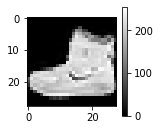

In [7]:
plt.figure(figsize=(2,2))
plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images/255.0

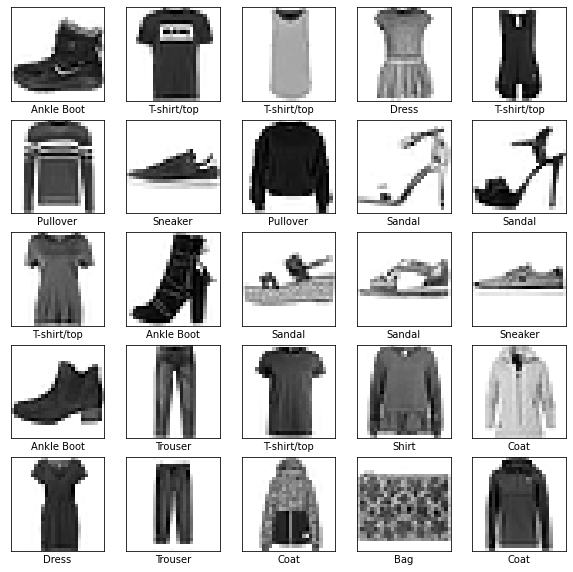

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
train_images = np.expand_dims(train_images, 3)

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4955 - accuracy: 0.8174
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3169 - accuracy: 0.8849
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2722 - accuracy: 0.9005
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2411 - accuracy: 0.9106
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2152 - accuracy: 0.9208
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1978 - accuracy: 0.9260
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1802 - accuracy: 0.9330
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1651 - accuracy: 0.9390
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1489 - accuracy: 0.9442
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.136

In [0]:
test_images = np.expand_dims(test_images, 3)

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 1s - loss: 0.2974 - accuracy: 0.9072
Test accuracy: 0.9071999788284302


In [0]:
predictions = model.predict(test_images)

In [18]:
predictions[0]

array([6.9183792e-10, 1.0869844e-09, 7.0411060e-10, 5.1470595e-11,
       6.7521461e-11, 9.5528333e-07, 1.8811519e-13, 8.2307233e-05,
       8.9908121e-07, 9.9991572e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]

  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = "#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

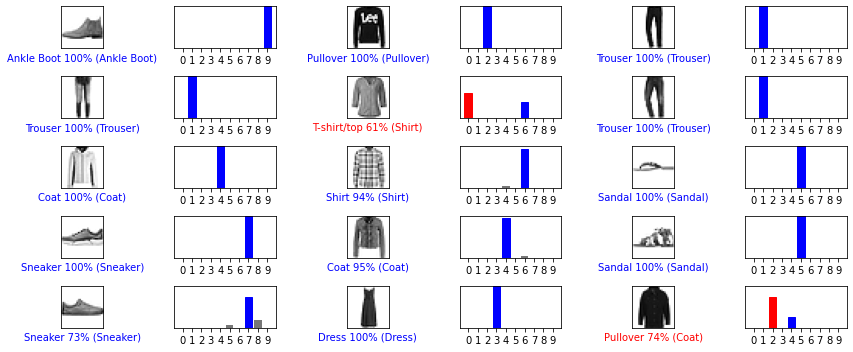

In [21]:
test_images = np.squeeze(test_images)
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()